<a href="https://colab.research.google.com/github/tmtsmrsl/machine-learning-zoomcamp/blob/master/notebook/fashion_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 8. Neural networks and deep learning

This week, we'll learn about neural nets and build a model
for classifying images of clothes


## 8.1 Fashion classification

Dataset:

* Full: https://github.com/alexeygrigorev/clothing-dataset
* Small: https://github.com/alexeygrigorev/clothing-dataset-small

Links:

* https://cs231n.github.io/

In [1]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439 (from 1)
Receiving objects: 100% (3839/3839), 100.58 MiB | 16.48 MiB/s, done.
Resolving deltas: 100% (10/10), done.


## 8.2 TensorFlow and Keras

* Installing TensorFlow
* Loading images

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
from tensorflow.keras.preprocessing.image import load_img

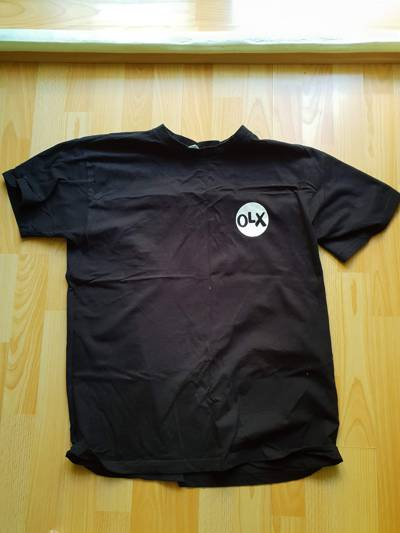

In [5]:
path = './clothing-dataset-small/train/t-shirt'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [6]:
img = load_img(fullname, target_size=(299, 299))

In [7]:
x = np.array(img)
x.shape

(299, 299, 3)

## 8.3 Pre-trained convolutional neural networks

* Imagenet dataset: https://www.image-net.org/
* Pre-trained models: https://keras.io/api/applications/


In [8]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [ ]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

In [ ]:
model.summary()

Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_23            │ (None, 299, 299, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 149, 149, 32)   │            864 │ input_layer_23[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 149, 149, 32)   │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 149, 149, 32)   │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 147, 147, 64)   │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 147, 147, 64)   │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 147, 147, 64)   │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 147, 147, 128)  │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 147, 147, 128)  │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 147, 147, 128)  │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 147, 147, 128)  │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 147, 147, 128)  │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_48 (Conv2D)        │ (None, 74, 74, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 74, 74, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 22,910,480 (87.40 MB)

 Trainable params: 22,855,952 (87.19 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [ ]:
X = np.array([x])

In [ ]:
X.shape

(1, 299, 299, 3)

In [ ]:
X = preprocess_input(X)

In [ ]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [ ]:
decode_predictions(pred)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


[[('n03595614', 'jersey', 0.68196356),
  ('n02916936', 'bulletproof_vest', 0.038139995),
  ('n04370456', 'sweatshirt', 0.034324735),
  ('n03710637', 'maillot', 0.011354207),
  ('n04525038', 'velvet', 0.0018453562)]]

## 8.4 Convolutional neural networks

* Types of layers: convolutional and dense
* Convolutional layers and filters
* Dense layers

There are more layers. Read here: https://cs231n.github.io/

## 8.5 Transfer learning

* Reading data with `ImageDataGenerator`
* Train `Xception` on smaller images (150x150)

(Better to run it with a GPU)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [ ]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [ ]:
X, y = next(train_ds)

In [ ]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

In [ ]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [ ]:
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False



inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=True)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [ ]:
base_model.summary()

Model: "xception"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_24            │ (None, 150, 150, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 74, 74, 32)     │            864 │ input_layer_24[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 74, 74, 32)     │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 74, 74, 32)     │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 72, 72, 64)     │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 72, 72, 64)     │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 72, 72, 64)     │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 72, 72, 128)    │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 72, 72, 128)    │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 72, 72, 128)    │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 72, 72, 128)    │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 72, 72, 128)    │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_52 (Conv2D)        │ (None, 36, 36, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 36, 36, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 20,861,480 (79.58 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,861,480 (79.58 MB)

In [ ]:
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_25 (InputLayer)          │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 5, 5, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_11          │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │          20,490 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,881,970 (79.66 MB)

 Trainable params: 20,490 (80.04 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [ ]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [26]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 32s 218ms/step - accuracy: 0.5734 - loss: 1.7592 - val_accuracy: 0.7977 - val_loss: 0.7788
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.8466 - loss: 0.5058 - val_accuracy: 0.8152 - val_loss: 0.7466
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - accuracy: 0.8974 - loss: 0.2928 - val_accuracy: 0.7918 - val_loss: 0.8777
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.9120 - loss: 0.2333 - val_accuracy: 0.8035 - val_loss: 0.8417
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - accuracy: 0.9574 - loss: 0.1298 - val_accuracy: 0.7830 - val_loss: 0.9116
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 95ms/step - accuracy: 0.9671 - loss: 0.0910 - val_accuracy: 0.8123 - val_loss: 0.9023
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.9826 - loss: 0.0655 - val_accuracy: 0.7977 - val_loss: 1.0295
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.9778 - loss: 0.0681 - val_accuracy: 0.8299 - val_lo

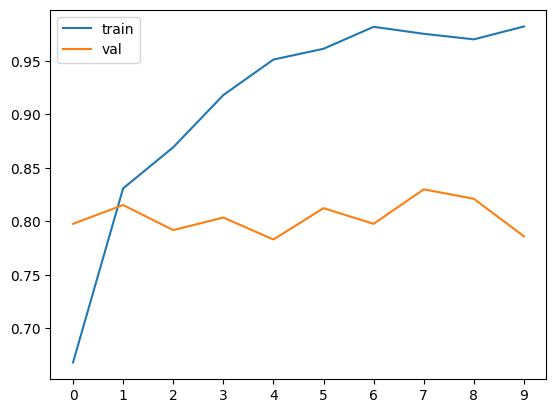

In [27]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## 8.6 Adjusting the learning rate

* What's the learning rate
* Trying different values

In [28]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=True)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 133ms/step - accuracy: 0.1756 - loss: 2.3264 - val_accuracy: 0.4751 - val_loss: 1.6941
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 86ms/step - accuracy: 0.5056 - loss: 1.5261 - val_accuracy: 0.5748 - val_loss: 1.3025
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 85ms/step - accuracy: 0.6302 - loss: 1.2091 - val_accuracy: 0.6833 - val_loss: 1.0990
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.6768 - loss: 1.0467 - val_accuracy: 0.7097 - val_loss: 0.9775
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 93ms/step - accuracy: 0.7185 - loss: 0.9162 - val_accuracy: 0.7361 - val_loss: 0.8984
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.7296 - loss: 0.8706 - val_accuracy: 0.7449 - val_loss: 0.8409
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - accuracy: 0.7532 - loss: 0.7965 - val_accuracy: 0.7654 - val_loss: 0.7947
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 0.7588 - loss: 0.7529 - val_accuracy

In [ ]:
del scores[0.1]
del scores[0.0001]

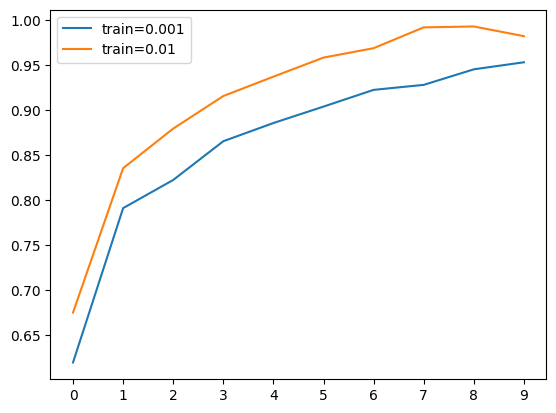

In [ ]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
    # plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

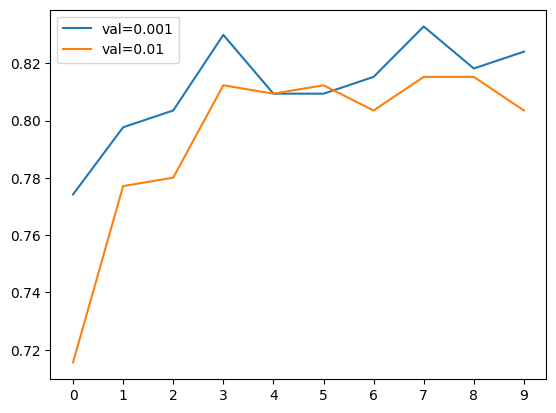

In [ ]:
for lr, hist in scores.items():
    # plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [ ]:
learning_rate = 0.001

## 8.7 Checkpointing

* Saving the best model only
* Training a model with callbacks

In [ ]:
model.save_weights('model_v1.weights.h5')

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [ ]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 28s 231ms/step - accuracy: 0.5297 - loss: 1.4227 - val_accuracy: 0.7595 - val_loss: 0.7277
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.7713 - loss: 0.6347 - val_accuracy: 0.8006 - val_loss: 0.6309
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.8390 - loss: 0.5051 - val_accuracy: 0.8094 - val_loss: 0.5956
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 96ms/step - accuracy: 0.8764 - loss: 0.4418 - val_accuracy: 0.8152 - val_loss: 0.5743
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.8913 - loss: 0.3700 - val_accuracy: 0.8182 - val_loss: 0.5736
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 81ms/step - accuracy: 0.9026 - loss: 0.3307 - val_accuracy: 0.8270 - val_loss: 0.5497
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - accuracy: 0.9277 - loss: 0.2684 - val_accuracy: 0.8299 - val_loss: 0.5513
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.9393 - loss: 0.2536 - val_accuracy: 0.818

## 8.8 Adding more layers


* Adding one inner dense layer
* Experimenting with different sizes of inner layer

In [ ]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=True)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

    outputs = keras.layers.Dense(10)(inner)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 18s 129ms/step - accuracy: 0.3037 - loss: 1.9348 - val_accuracy: 0.7067 - val_loss: 1.0168
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.6971 - loss: 0.9522 - val_accuracy: 0.7507 - val_loss: 0.8045
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.7524 - loss: 0.7352 - val_accuracy: 0.7625 - val_loss: 0.7323
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.7964 - loss: 0.6048 - val_accuracy: 0.7683 - val_loss: 0.6934
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.8146 - loss: 0.5511 - val_accuracy: 0.7771 - val_loss: 0.6540
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - accuracy: 0.8409 - loss: 0.4906 - val_accuracy: 0.7859 - val_loss: 0.6777
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.8636 - loss: 0.4485 - val_accuracy: 0.7947 - val_loss: 0.6309
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.8832 - loss: 0.3945 - val_accuracy: 0.8

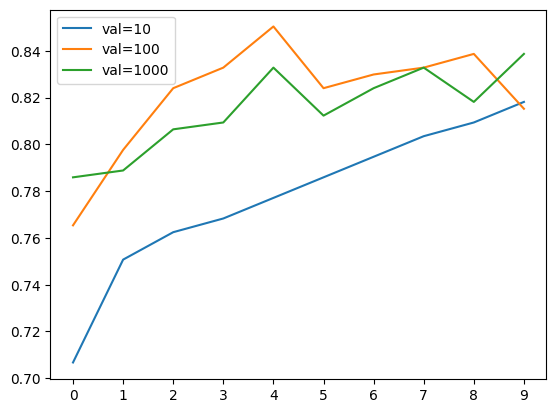

In [ ]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.legend()

## 8.9 Regularization and dropout

* Regularizing by freezing a part of the network
* Adding dropout to our model
* Experimenting with different values

In [ ]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=True)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [ ]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

0.0
Epoch 1/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.5655 - loss: 1.3156 - val_accuracy: 0.8152 - val_loss: 0.6259
Epoch 2/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 14s 83ms/step - accuracy: 0.8169 - loss: 0.5302 - val_accuracy: 0.8182 - val_loss: 0.5667
Epoch 3/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.8962 - loss: 0.3357 - val_accuracy: 0.7918 - val_loss: 0.6111
Epoch 4/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 8s 78ms/step - accuracy: 0.9295 - loss: 0.2466 - val_accuracy: 0.8182 - val_loss: 0.5432
Epoch 5/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9542 - loss: 0.1843 - val_accuracy: 0.8123 - val_loss: 0.5805
Epoch 6/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - accuracy: 0.9687 - loss: 0.1370 - val_accuracy: 0.8182 - val_loss: 0.5953
Epoch 7/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - accuracy: 0.9843 - loss: 0.0930 - val_accuracy: 0.8240 - val_loss: 0.5788
Epoch 8/30
96/96 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - accuracy: 0.9902 - loss: 0.0706 - val_accuracy:

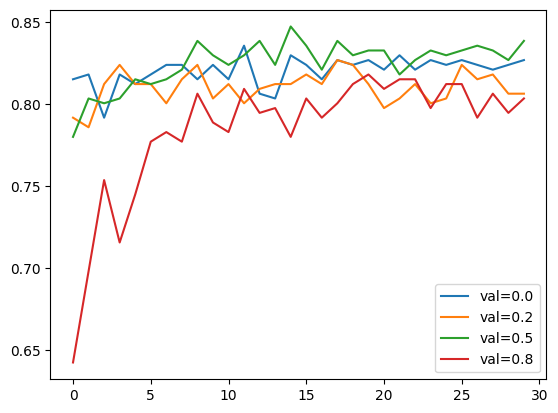

In [ ]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.legend()

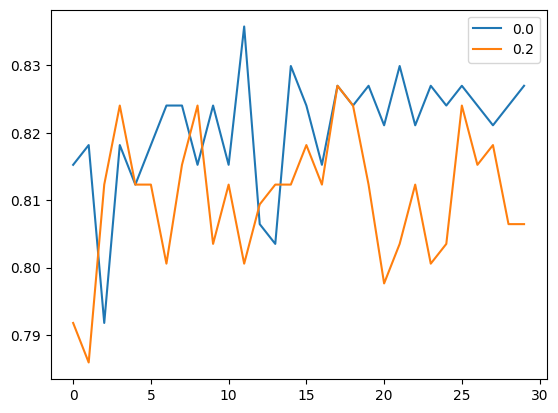

In [ ]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## 8.10 Data augmentation

* Different data augmentations
* Training a model with augmentations
* How to select data augmentations?

In [ ]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
#     vertical_flip=True,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [ ]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 35s 282ms/step - accuracy: 0.5045 - loss: 1.4519 - val_accuracy: 0.7771 - val_loss: 0.6953
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 224ms/step - accuracy: 0.7686 - loss: 0.6980 - val_accuracy: 0.8065 - val_loss: 0.6254
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 22s 218ms/step - accuracy: 0.7927 - loss: 0.5955 - val_accuracy: 0.7947 - val_loss: 0.6075
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 221ms/step - accuracy: 0.8117 - loss: 0.5417 - val_accuracy: 0.8240 - val_loss: 0.5369
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 41s 224ms/step - accuracy: 0.8588 - loss: 0.4187 - val_accuracy: 0.8094 - val_loss: 0.5550
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 41s 230ms/step - accuracy: 0.8468 - loss: 0.4158 - val_accuracy: 0.8152 - val_loss: 0.5557
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 230ms/step - accuracy: 0.8677 - loss: 0.3780 - val_accuracy: 0.8123 - val_loss: 0.5867
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 23s 224ms/step - accuracy: 0.8804 - loss: 0.3468 - val_accuracy: 0.821

KeyboardInterrupt: 

In [ ]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## 8.11 Training a larger model

* Train a 299x299 model

In [10]:
def make_model(input_size=150, learning_rate=0.01, size_inner=100,
               droprate=0.5):

    base_model = Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(input_size, input_size, 3)
    )

    base_model.trainable = False

    #########################################

    inputs = keras.Input(shape=(input_size, input_size, 3))
    base = base_model(inputs, training=True)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    #########################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [11]:
input_size = 299

In [12]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(input_size, input_size),
    batch_size=32
)


val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(input_size, input_size),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [13]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v4_1_{epoch:02d}_{val_accuracy:.3f}.keras',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [14]:
learning_rate = 0.0005
size = 100
droprate = 0.2

model = make_model(
    input_size=input_size,
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds,
                   callbacks=[checkpoint])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


96/96 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.5343 - loss: 1.4215 - val_accuracy: 0.8270 - val_loss: 0.5537
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 78s 759ms/step - accuracy: 0.8168 - loss: 0.5303 - val_accuracy: 0.8680 - val_loss: 0.4401
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 78s 754ms/step - accuracy: 0.8486 - loss: 0.4476 - val_accuracy: 0.8710 - val_loss: 0.3968
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 77s 746ms/step - accuracy: 0.8690 - loss: 0.3773 - val_accuracy: 0.8680 - val_loss: 0.3803
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 80s 792ms/step - accuracy: 0.8822 - loss: 0.3473 - val_accuracy: 0.8768 - val_loss: 0.3635
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 80s 758ms/step - accuracy: 0.8964 - loss: 0.3020 - val_accuracy: 0.8739 - val_loss: 0.3681
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 82s 773ms/step - accuracy: 0.9047 - loss: 0.2774 - val_accuracy: 0.8798 - val_loss: 0.3661
Epoch 8/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 80s 790ms/step - accuracy: 0.9032 - loss: 0.2846 - val_accuracy: 0.8651 

KeyboardInterrupt: 

In [ ]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

## 8.12 Using the model

* Loading the model
* Evaluating the model
* Getting predictions

In [15]:
import tensorflow as tf
from tensorflow import keras

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.applications.xception import preprocess_input

In [17]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory(
    './clothing-dataset-small/test',
    target_size=(299, 299),
    batch_size=32,
    shuffle=False
)

Found 372 images belonging to 10 classes.


In [33]:
model = keras.models.load_model('/content/xception_v4_1_05_0.877.keras')

In [34]:
model.evaluate(test_ds)

12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 352ms/step - accuracy: 0.8778 - loss: 0.3313


[0.2934114933013916, 0.8924731016159058]

In [35]:
path = 'clothing-dataset-small/test/pants/c8d21106-bbdb-4e8d-83e4-bf3d14e54c16.jpg'

In [36]:
img = load_img(path, target_size=(299, 299))

In [37]:
import numpy as np

In [38]:
x = np.array(img)
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [39]:
X = preprocess_input(X)

In [40]:
pred = model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [41]:
classes = [
    'dress',
    'hat',
    'longsleeve',
    'outwear',
    'pants',
    'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt'
]

In [42]:
dict(zip(classes, pred[0]))

{'dress': -1.8169667,
 'hat': -4.6778407,
 'longsleeve': -0.1525785,
 'outwear': -0.8940278,
 'pants': 8.579915,
 'shirt': -0.1061659,
 'shoes': -1.9168507,
 'shorts': 3.3418293,
 'skirt': -1.6220111,
 't-shirt': -2.5626464}

## 8.13 Summary

* We can use pre-trained models for general image classification
* Convolutional layers let us turn an image into a vector
* Dense layers use the vector to make the predictions
* Instead of training a model from scratch, we can use transfer learning and re-use already trained convolutional layers
* First, train a small model (150x150) before training a big one (299x299)
* Learning rate - how fast the model trians. Fast learners aren't always best ones
* We can save the best model using callbacks and checkpointing
* To avoid overfitting, use dropout and augmentation

## 8.14 Explore more

* Add more data, e.g. Zalando, etc (ADD LINKS)
* Albumentations - another way of generating augmentations
* Use PyTorch or MXNet instead of TensorFlow/Keras
* In addition to Xception, there are others architectures - try them

Other projects:

* cats vs dogs
* Hotdog vs not hotdog
* Category of images

